In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score

In [3]:
dados = pd.read_csv("/Users/geraldocangondo/Desktop/Data_Analise/Data_Science_Udemy/One_weak_Classsification/UCI_Credit_Card.csv")

In [4]:
dados.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
dados.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
linhas, colunas = dados.shape
print(f'Total de Linhas:{linhas}')
print(f'Total de Colunas:{colunas}')

Total de Linhas:30000
Total de Colunas:25


In [7]:
dados.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


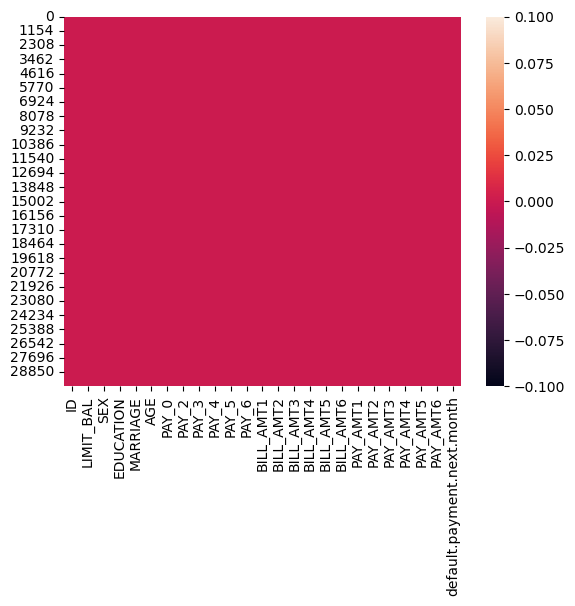

In [8]:
#Verificação de dados em faltas
sns.heatmap(dados.isnull());

In [9]:
#1 ) - Verificação Gráfica dos dados em Geral 

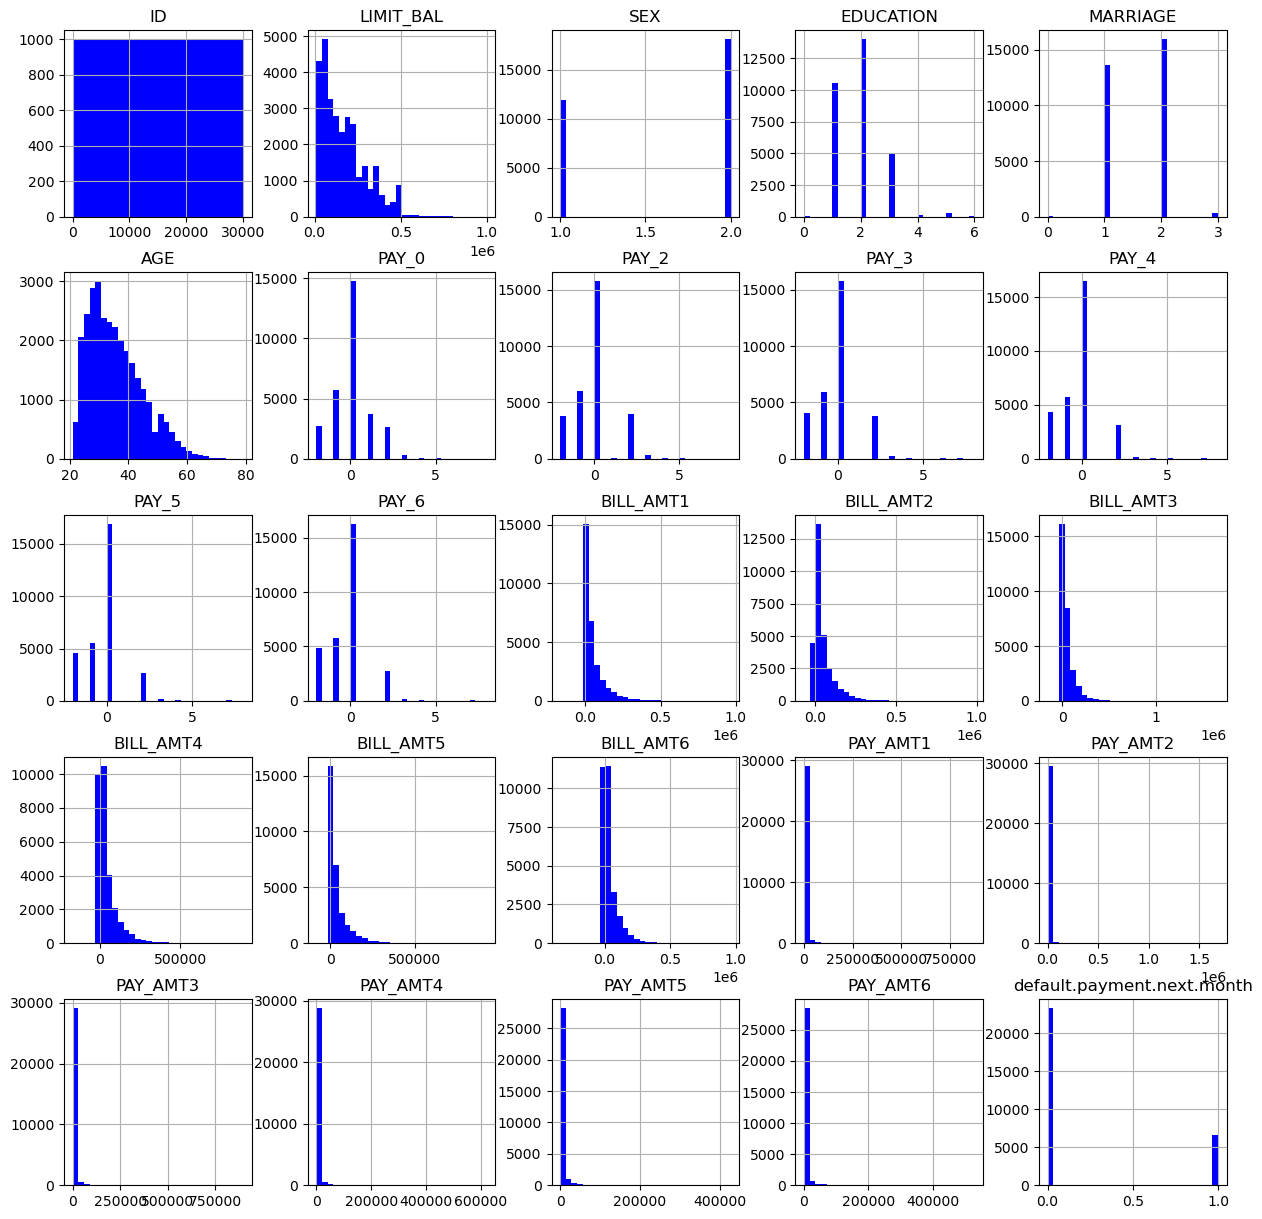

In [10]:
dados.hist(bins=30, figsize=(15, 15), color = 'b');

In [11]:
#2) - Eliminação da Coluna "ID" por ser irrelevante:

dados.drop(['ID'], axis = 1, inplace = True)

In [12]:
dados

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [13]:
#3 ) - Análise dos clientes que não cumpriram com os seus respectivos clientes
#Verificação do balanceamento dos dados

In [14]:
df_default = dados[dados['default.payment.next.month'] == 1] 
df_no_default = dados[dados['default.payment.next.month'] == 0] 

In [15]:
df_default

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
13,70000.0,1,2,2,30,1,2,2,0,0,...,66782.0,36137.0,36894.0,3200.0,0.0,3000.0,3000.0,1500.0,0.0,1
16,20000.0,1,1,2,24,0,0,2,2,2,...,18338.0,17905.0,19104.0,3200.0,0.0,1500.0,0.0,1650.0,0.0,1
21,120000.0,2,2,1,39,-1,-1,-1,-1,-1,...,0.0,632.0,316.0,316.0,316.0,0.0,632.0,316.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29991,210000.0,1,2,1,34,3,2,2,2,2,...,2500.0,2500.0,2500.0,0.0,0.0,0.0,0.0,0.0,0.0,1
29994,80000.0,1,2,2,34,2,2,2,2,2,...,77519.0,82607.0,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0,1
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [16]:
df_default.shape

(6636, 24)

In [17]:
df_no_default

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,50000.0,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,500000.0,1,1,2,29,0,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29990,140000.0,1,2,1,41,0,0,0,0,0,...,138262.0,49675.0,46121.0,6000.0,7000.0,4228.0,1505.0,2000.0,2000.0,0
29992,10000.0,1,3,1,43,0,0,0,-2,-2,...,0.0,0.0,0.0,2000.0,0.0,0.0,0.0,0.0,0.0,0
29993,100000.0,1,1,2,38,0,-1,-1,0,0,...,70626.0,69473.0,55004.0,2000.0,111784.0,4000.0,3000.0,2000.0,2000.0,0
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0


In [18]:
df_no_default.shape

(23364, 24)

In [19]:
#Verificação total dos dados
print("O Total de dados existente no dataset é ",len(dados))
print("O total de clientes que não cumpriram com seus pagamentos com cartão de crédito", len(df_default), 
      "correspondente a:",1.*len(df_default)/len(dados)*100.0, "%")
print("O numero de clientes fieis com o seu pagameto do cartão de crédito é",len(df_no_default), 
      "correspondente a:", 1.*len(df_no_default)/len(dados)*100.0, "%")

O Total de dados existente no dataset é  30000
O total de clientes que não cumpriram com seus pagamentos com cartão de crédito 6636 correspondente a: 22.12 %
O numero de clientes fieis com o seu pagameto do cartão de crédito é 23364 correspondente a: 77.88000000000001 %


In [20]:
#Verificação do desvio padrão de cada dados. sO que pagaram e não pagaram.
df_default.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,...,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.0
mean,130109.656420,1.567058,1.894665,1.528029,35.725738,0.668174,0.458258,0.362116,0.254521,0.167872,...,42036.950573,39540.190476,38271.435503,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068,1.0
std,115378.540571,0.495520,0.728096,0.525433,9.693438,1.383252,1.502243,1.499401,1.508535,1.482833,...,64351.076092,61424.695949,59579.674268,9544.252427,11737.986064,12959.624486,11191.973162,11944.731175,13464.005894,0.0
min,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-65167.000000,-53007.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,...,2141.500000,1502.750000,1150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,90000.000000,2.000000,2.000000,2.000000,34.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,19119.500000,18478.500000,18028.500000,1636.000000,1533.500000,1222.000000,1000.000000,1000.000000,1000.000000,1.0
75%,200000.000000,2.000000,2.000000,2.000000,42.000000,2.000000,2.000000,2.000000,2.000000,0.000000,...,50175.750000,47853.000000,47424.000000,3478.250000,3309.750000,3000.000000,2939.250000,3000.000000,2974.500000,1.0
max,740000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,7.000000,8.000000,8.000000,8.000000,...,548020.000000,547880.000000,514975.000000,300000.000000,358689.000000,508229.000000,432130.000000,332000.000000,345293.000000,1.0


In [21]:
df_no_default.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,...,23364.000000,23364.000000,23364.000000,23364.000000,2.336400e+04,23364.000000,23364.000000,23364.000000,23364.000000,23364.0
mean,178099.726074,1.614150,1.841337,1.558637,35.417266,-0.211222,-0.301917,-0.316256,-0.355633,-0.389488,...,43611.165254,40530.445343,39042.268704,6307.337357,6.640465e+03,5753.496833,5300.529319,5248.220296,5719.371769,0.0
std,131628.359660,0.486806,0.806780,0.520794,9.077355,0.952464,1.035191,1.048378,1.013162,0.977591,...,64324.796730,60617.268112,59547.015717,18014.508990,2.530226e+04,18684.255937,16689.778060,16071.667860,18792.950473,0.0
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0
25%,70000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2360.000000,1823.000000,1265.500000,1163.750000,1.005000e+03,600.000000,390.000000,369.000000,300.000000,0.0
50%,150000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19000.000000,17998.000000,16679.000000,2459.500000,2.247500e+03,2000.000000,1734.000000,1765.000000,1706.000000,0.0
75%,250000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55988.000000,51135.250000,49842.500000,5606.250000,5.311250e+03,5000.000000,4602.000000,4600.000000,4545.000000,0.0
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,7.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,0.0


In [125]:
#4) - Plotagem Gráfica da Matrix correlacional

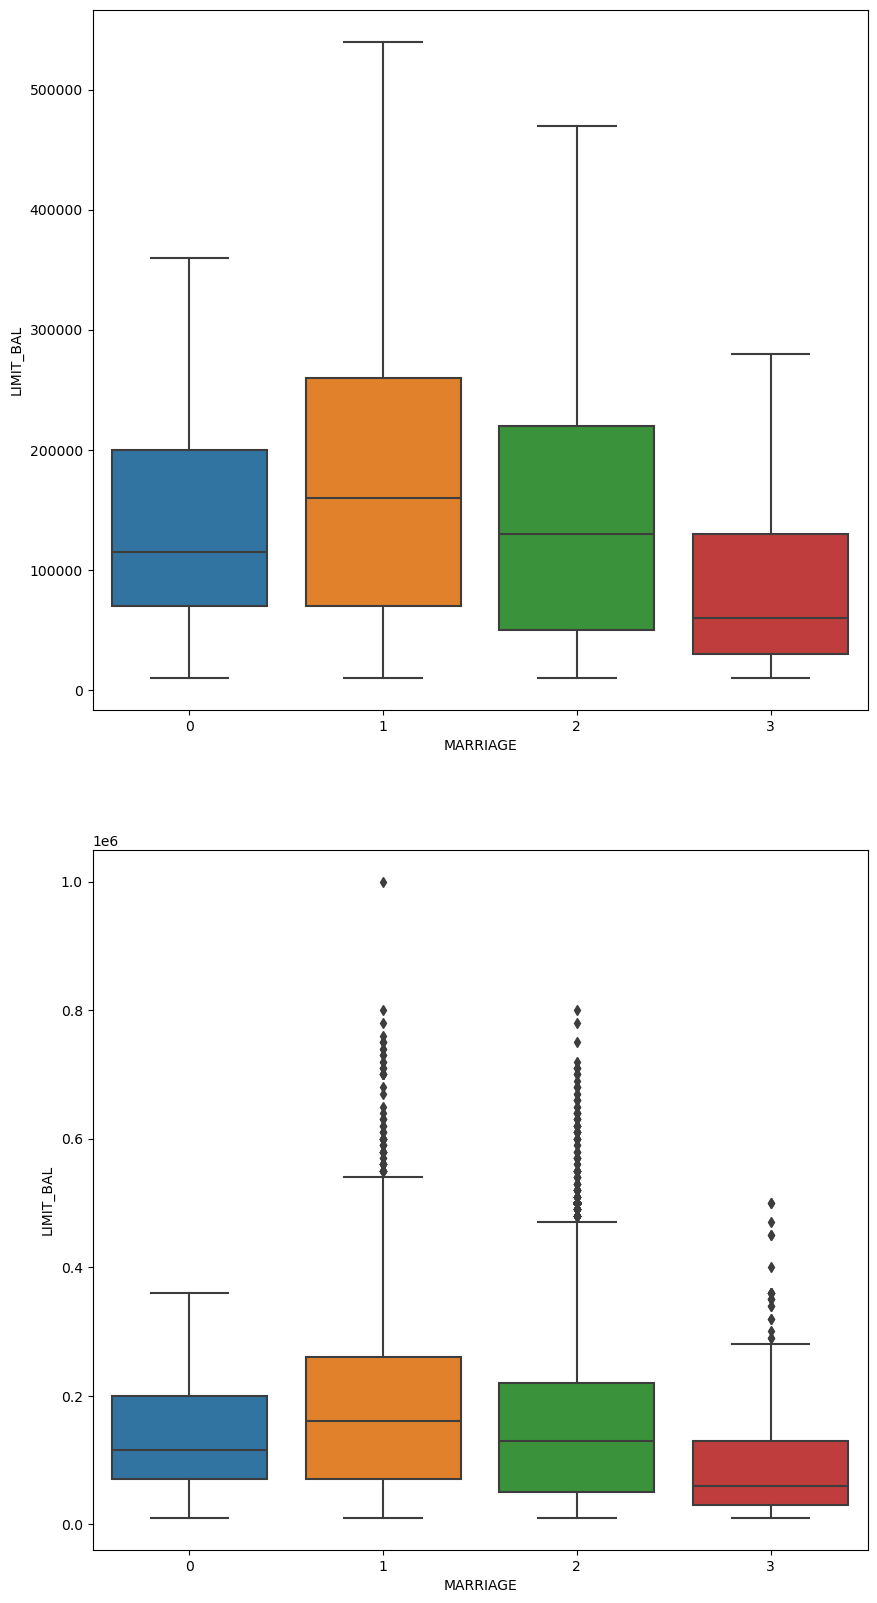

In [23]:
plt.figure(figsize=(10,20))
plt.subplot(211)
sns.boxplot(x = 'MARRIAGE', y = 'LIMIT_BAL', data = dados, showfliers = False);
plt.subplot(212)
sns.boxplot(x = 'MARRIAGE', y = 'LIMIT_BAL', data = dados);

In [24]:
#5) Preparação dos dados para Treinar e Testar

In [25]:
#Dados Categóricos para utilizar no OnehotEncoder
df_categorico = dados[['SEX', 'EDUCATION', 'MARRIAGE']]

In [26]:
df_categorico

,SEX,EDUCATION,MARRIAGE
0,2,2,1
1,2,2,2
2,2,2,2
3,2,2,1
4,1,2,1
...,...,...,...
29995,1,3,1
29996,1,3,2
29997,1,2,2
29998,1,3,1


In [27]:
#Aplicação do OneHotEncoder()

o_h_encoder = OneHotEncoder()
df_categorico = o_h_encoder.fit_transform(df_categorico).toarray()

In [28]:
df_categorico.shape

(30000, 13)

In [29]:
df_categorico = pd.DataFrame(df_categorico)

In [30]:
df_categorico

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [31]:
#Seleção das variaveis (x):

df_numerical = dados[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

df_numerical

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000.0,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000.0,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000.0,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [32]:
x_dados = pd.concat([df_categorico, df_numerical], axis  = 1)

In [33]:
x_dados

,0,1,2,3,4,5,6,7,8,9,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [36]:
x_dados.columns = x_dados.columns.astype(str)

In [37]:
scaler = MinMaxScaler()
x_dados = scaler.fit_transform(x_dados)

In [38]:
y_dados = dados['default.payment.next.month']

In [39]:
y_dados

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default.payment.next.month, Length: 30000, dtype: int64

In [ ]:
#Divisão dos dados
x_treino, x_teste, y_treino, y_teste = train_test_split(x_dados, y_dados, test_size=0.2)

In [42]:
x_treino.shape

(24000, 33)

In [43]:
x_teste.shape

(6000, 33)

#6 ) Treino com XG-BOOST CLASSIFIER MODEL

In [ ]:
modelo_xgb = xgb.XGBClassifier(Learnin_rate = 0.1, max_depth = 20, use_label_encoder = False)
modelo_xgb.fit(x_treino, y_treino)

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [20:53:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "Learnin_rate", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(Learnin_rate=0.1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [48]:
y_predict = modelo_xgb.predict(x_teste)

In [49]:
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [50]:
y_teste

7081     1
13981    0
20483    1
18278    1
25492    0
        ..
21835    1
26609    1
29912    0
9682     0
23438    0
Name: default.payment.next.month, Length: 6000, dtype: int64

In [ ]:
print(f" Accuracy {round(100 * accuracy_score(y_predict, y_teste), 2)} %")

 Accuracy 81.32 %


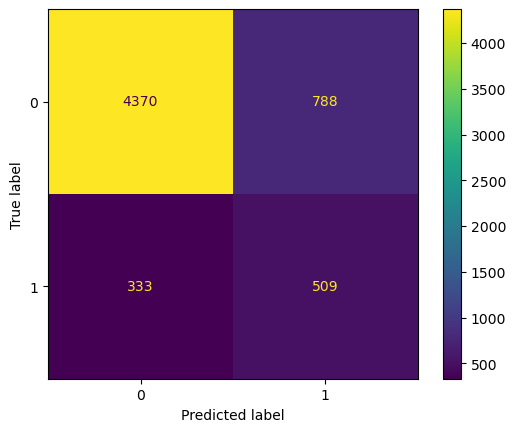

In [68]:
#Verificar o desempenho do modelo no conjunto de dados de teste
matriz_xgb = confusion_matrix(y_predict, y_teste)
visual = ConfusionMatrixDisplay(confusion_matrix=matriz_xgb)
visual.plot();

In [69]:
#Imprimir o relatório da classificador
print(classification_report(y_teste, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      4703
           1       0.60      0.39      0.48      1297

    accuracy                           0.81      6000
   macro avg       0.73      0.66      0.68      6000
weighted avg       0.79      0.81      0.80      6000



#7 ) Treino com  LOGISTIC REGRESSION CLASSIFIER

In [70]:
x_treino

array([[1.        , 0.        , 0.        , ..., 0.01034138, 0.01426867,
        0.00756621],
       [0.        , 1.        , 0.        , ..., 0.02432206, 0.03930331,
        0.01724718],
       [0.        , 1.        , 0.        , ..., 0.01449275, 0.04454562,
        0.01702398],
       ...,
       [0.        , 1.        , 0.        , ..., 0.00144928, 0.00586127,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.00484541, 0.00707103,
        0.00568979],
       [0.        , 1.        , 0.        , ..., 0.01049436, 0.00805104,
        0.00970745]])

In [73]:
modelo_LR = LogisticRegression(max_iter = 10000)
modelo_LR.fit(x_treino, y_treino)

LogisticRegression(max_iter=10000)

In [74]:
y_predict = modelo_LR.predict(x_teste)

In [75]:
print(f" Accuracy {round(100 * accuracy_score(y_predict, y_teste), 2)} %")

 Accuracy 81.63 %


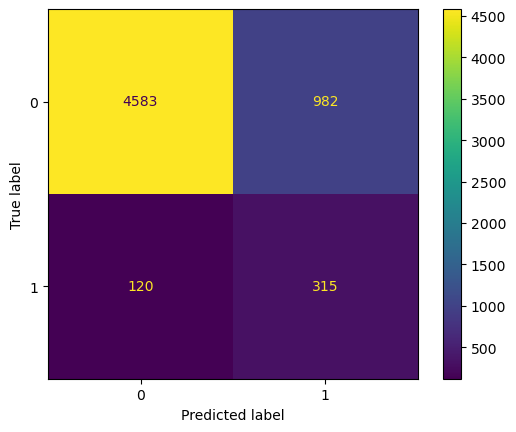

In [76]:
#Verificar o desempenho do modelo no conjunto de dados de teste
matriz_LR = confusion_matrix(y_predict, y_teste)
visual = ConfusionMatrixDisplay(confusion_matrix=matriz_LR)
visual.plot();

In [96]:
print(classification_report(y_teste, y_predict))
# precisão é a relação de TP/(TP+FP)
# recall é a proporção de TP/(TP+FN)
# F-beta pode ser interpretado como uma média harmônica ponderada da precisão e do recall
# onde um escore F-beta atinge seu melhor valor em 1 e o pior escore em 0. 

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4703
           1       0.64      0.40      0.49      1297

    accuracy                           0.82      6000
   macro avg       0.75      0.67      0.69      6000
weighted avg       0.80      0.82      0.81      6000



#8 ) Treino com SUPPORT VECTOR MACHINE CLASSIFIER

In [116]:
modelo_svm = LinearSVC(max_iter = 1000)
modelo_svm = CalibratedClassifierCV(modelo_svm)
modelo_svm.fit(x_treino, y_treino)

CalibratedClassifierCV(estimator=LinearSVC())

In [117]:
y_predict = modelo_svm.predict(x_teste)

In [118]:
print(f" Accuracy {round(100 * accuracy_score(y_predict, y_teste), 2)} %")

 Accuracy 81.78 %


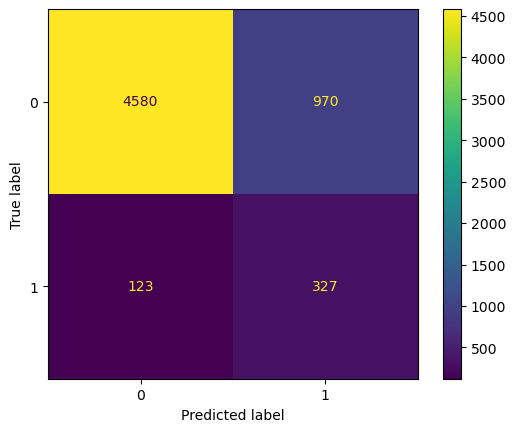

In [119]:
#Verificar o desempenho do modelo no conjunto de dados de teste
matriz_svm = confusion_matrix(y_predict, y_teste)
visual = ConfusionMatrixDisplay(confusion_matrix=matriz_svm)
visual.plot();

In [120]:
#Imprimir o relatório do classificador
print(classification_report(y_teste, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      4703
           1       0.73      0.25      0.37      1297

    accuracy                           0.82      6000
   macro avg       0.78      0.61      0.63      6000
weighted avg       0.80      0.82      0.78      6000



#9 ) Treino com RANDOM FOREST CLASSIFIER

In [86]:
modelo_rf = RandomForestClassifier()
modelo_rf.fit(x_treino, y_treino)

RandomForestClassifier()

In [87]:
y_predict = modelo_rf.predict(x_teste)

In [88]:
print(f" Accuracy {round(100 * accuracy_score(y_predict, y_teste), 2)} %")

 Accuracy 82.18 %


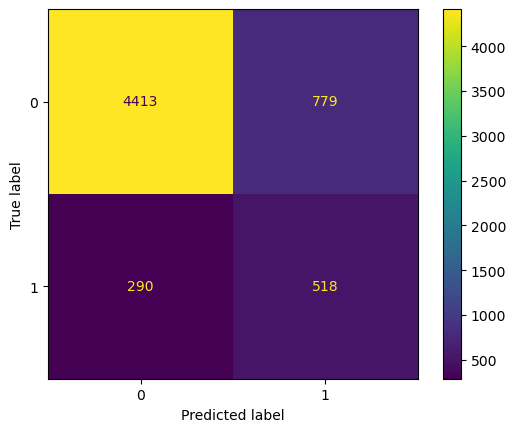

In [89]:
#Verificar o desempenho do modelo no conjunto de dados de teste
matriz_rf = confusion_matrix(y_predict, y_teste)
visual = ConfusionMatrixDisplay(confusion_matrix=matriz_rf)
visual.plot();

In [ ]:
#Imprimir o relatório do classificador
print(classification_report(y_teste, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4703
           1       0.64      0.40      0.49      1297

    accuracy                           0.82      6000
   macro avg       0.75      0.67      0.69      6000
weighted avg       0.80      0.82      0.81      6000



#10 ) Treino com K-NEAREST NEIGHBOUR (KNN)

In [99]:
modelo_knn = KNeighborsClassifier()
modelo_knn.fit(x_treino, y_treino)

KNeighborsClassifier()

In [100]:
y_predict = modelo_knn.predict(x_teste)

In [101]:
print(f" Accuracy {round(100 * accuracy_score(y_predict, y_teste), 2)} %")

 Accuracy 79.5 %


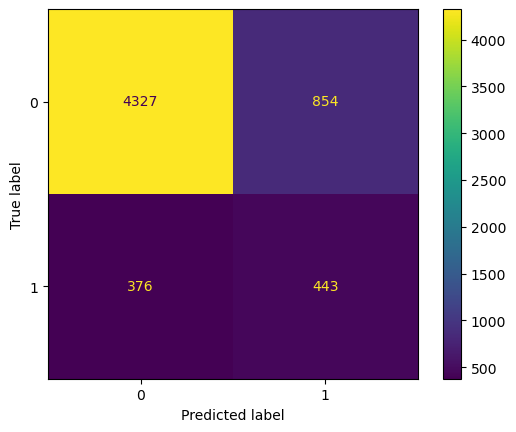

In [102]:
#Verificar o desempenho do modelo no conjunto de dados de teste
matriz_knn = confusion_matrix(y_predict, y_teste)
visual = ConfusionMatrixDisplay(confusion_matrix=matriz_knn)
visual.plot();

In [104]:
#Imprimir o relatório do classificador
print(classification_report(y_teste, y_predict))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4703
           1       0.54      0.34      0.42      1297

    accuracy                           0.80      6000
   macro avg       0.69      0.63      0.65      6000
weighted avg       0.77      0.80      0.78      6000



#11 ) Treino com NAIVE BAYES CLASSIFIER

In [108]:
modelo_nb = GaussianNB()
modelo_nb.fit(x_treino, y_treino)

GaussianNB()

In [109]:
y_predict = modelo_nb.predict(x_teste)

In [111]:
print(f" Accuracy {round(100 * accuracy_score(y_predict, y_teste), 2)} %")

 Accuracy 28.58 %


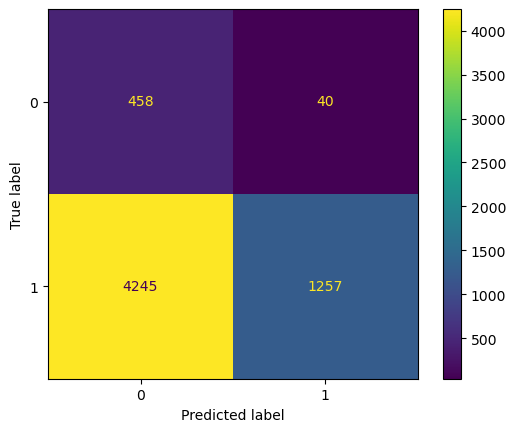

In [112]:
#Verificar o desempenho do modelo no conjunto de dados de teste
matriz_nb = confusion_matrix(y_predict, y_teste)
visual = ConfusionMatrixDisplay(confusion_matrix=matriz_nb)
visual.plot();

In [113]:
print(classification_report(y_teste, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.10      0.18      4703
           1       0.23      0.97      0.37      1297

    accuracy                           0.29      6000
   macro avg       0.57      0.53      0.27      6000
weighted avg       0.77      0.29      0.22      6000



#12 ) Comparação dos MODELOS por meio da CURVA ROC 

In [121]:
#Curva ROC
fpr0, tpr0, thresh0 = roc_curve(y_teste, modelo_xgb.predict_proba(x_teste)[:,1], pos_label = 1)
fpr1, tpr1, thresh1 = roc_curve(y_teste, modelo_LR.predict_proba(x_teste)[:,1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_teste, modelo_svm.predict_proba(x_teste)[:,1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_teste, modelo_rf.predict_proba(x_teste)[:,1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_teste, modelo_knn.predict_proba(x_teste)[:,1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_teste, modelo_nb.predict_proba(x_teste)[:,1], pos_label = 1)

In [ ]:
#AUC score
auc_score0 = roc_auc_score(y_teste, modelo_xgb.predict_proba(x_teste)[:, 1])
auc_score1 = roc_auc_score(y_teste, modelo_LR.predict_proba(x_teste)[:, 1])
auc_score2 = roc_auc_score(y_teste, modelo_svm.predict_proba(x_teste)[:, 1])
auc_score3 = roc_auc_score(y_teste, modelo_rf.predict_proba(x_teste)[:, 1])
auc_score4 = roc_auc_score(y_teste, modelo_knn.predict_proba(x_teste)[:, 1])
auc_score5 = roc_auc_score(y_teste, modelo_nb.predict_proba(x_teste)[:, 1])

print("XG-Boost Classifier: ", auc_score0) 
print("Logistic Regression: ", auc_score1) 
print("Support Vector Machine: ", auc_score2) 
print("Random Forest: ", auc_score3) 
print("K-Nearest Neighbors: ", auc_score4) 
print("Naive Bayes: ", auc_score5)

XG-Boost Classifier:  0.755099396028487
Logistic Regression:  0.7266771107403516
Support Vector Machine:  0.7254680529218133
Random Forest:  0.7621952129179507
K-Nearest Neighbors:  0.6952389024476413
Naive Bayes:  0.733837520006833


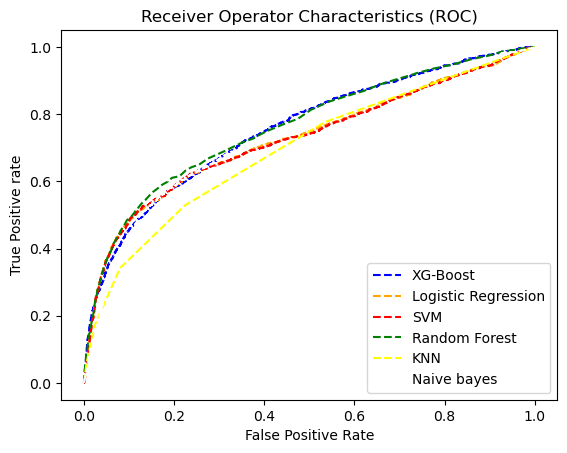

In [124]:
plt.plot(fpr0, tpr0, linestyle = "--", color = "blue", label = "XG-Boost")
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "white", label = "Naive bayes")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()